# netflix-movies-and-shows

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet
!pip install jovian opendatasets --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="netflix-movies-and-shows")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kiranpatel4192/netflix-movies-and-shows" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/kiranpatel4192/netflix-movies-and-shows


'https://jovian.ai/kiranpatel4192/netflix-movies-and-shows'

In [4]:
import opendatasets as od
dataset_url = "https://www.kaggle.com/shivamb/netflix-shows/download"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kpate352
Your Kaggle Key: ········


100%|██████████| 1.18M/1.18M [00:00<00:00, 92.5MB/s]

In [5]:
data_dir = './netflix-shows'

In [6]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

In [7]:
import pandas as pd

In [8]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [9]:
netflix_df['date_added'] = pd.to_datetime(netflix_df.date_added)
netflix_df['date_added_year'] = pd.DatetimeIndex(netflix_df.date_added).year
netflix_df['date_added_month'] = pd.DatetimeIndex(netflix_df.date_added).month
netflix_df['date_added_day'] = pd.DatetimeIndex(netflix_df.date_added).day
netflix_df['date_added_weekday'] = pd.DatetimeIndex(netflix_df.date_added).weekday

In [10]:
netflix_df['duration_in_mins'] = netflix_df['duration'].str.replace(r'\D', '').astype(int)

In [11]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_year', 'date_added_month', 'date_added_day',
       'date_added_weekday', 'duration_in_mins'],
      dtype='object')

In [12]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             7787 non-null   object        
 1   type                7787 non-null   object        
 2   title               7787 non-null   object        
 3   director            5398 non-null   object        
 4   cast                7069 non-null   object        
 5   country             7280 non-null   object        
 6   date_added          7777 non-null   datetime64[ns]
 7   release_year        7787 non-null   int64         
 8   rating              7780 non-null   object        
 9   duration            7787 non-null   object        
 10  listed_in           7787 non-null   object        
 11  description         7787 non-null   object        
 12  date_added_year     7777 non-null   float64       
 13  date_added_month    7777 non-null   float64     

We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Firstly, we need to separate the Netflix shows by Type: Movies and TV Shows since it will be much easier to do analysis based on a particular type of data.

In [13]:
netflix_df['listed_in'].value_counts()

Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, TV Comedies                                      1
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International Movies, Sports Movies                              1
TV Comedies, TV Dramas, TV Sci-Fi & Fantasy                      1
Classic Movies, Comedies, Romantic Movies                        1
Name: listed_in, Length: 492, dtype: int64

Let's define a helper function that turns a column containing lists of values (like `netflix_df_copy.listed_in`) into a data frame with one column for each possible option.

In [14]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [15]:
listed_in_df = split_multicolumn(netflix_df.listed_in)

In [16]:
listed_in_df

,"International TV Shows, TV Dramas, TV Sci-Fi & Fantasy","Dramas, International Movies","Horror Movies, International Movies","Action & Adventure, Independent Movies, Sci-Fi & Fantasy",Dramas,"International TV Shows, TV Dramas, TV Mysteries","Horror Movies, International Movies, Thrillers","Dramas, Thrillers","Crime TV Shows, International TV Shows, TV Dramas","Crime TV Shows, Docuseries, International TV Shows",...,"Classic & Cult TV, Crime TV Shows, TV Dramas","TV Horror, Teen TV Shows","Reality TV, Spanish-Language TV Shows","Action & Adventure, Documentaries, Sports Movies","Anime Features, International Movies, Sci-Fi & Fantasy","LGBTQ Movies, Thrillers","Action & Adventure, Sports Movies","International Movies, LGBTQ Movies, Romantic Movies","Kids' TV, Reality TV, Science & Nature TV","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
listed_in_totals = listed_in_df.sum().sort_values(ascending=False)
listed_in_totals

Dramas, International Movies                              15
Documentaries                                             12
Comedies, International Movies                            11
Independent Movies, Thrillers                              7
Anime Features, Children & Family Movies                   7
                                                          ..
Anime Series, International TV Shows, TV Thrillers         1
Horror Movies, International Movies, Sci-Fi & Fantasy      1
Comedies, Cult Movies, International Movies                1
Comedies, Music & Musicals, Romantic Movies                1
International TV Shows, TV Dramas, TV Sci-Fi & Fantasy     1
Length: 492, dtype: int64

In [18]:
net_cpy = netflix_df.copy()

In [19]:
net_cpy['listed_in'] = net_cpy['listed_in'].str.split(', ')

# explode the lists
net_cpy = net_cpy.explode('listed_in').reset_index(drop=True)


In [20]:
listed_in_data = net_cpy.listed_in.value_counts()
listed_in_data.drop(index='TV Shows', inplace=True)

In [21]:
netflix_movies_df = netflix_df[netflix_df['type']=='Movie']
netflix_movies_df_cpy = netflix_movies_df.copy()
netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show']
netflix_tvshows_df_cpy = netflix_tvshows_df.copy()

In [22]:
netflix_movies_df_cpy['listed_in'] = netflix_movies_df_cpy['listed_in'].str.split(', ')
netflix_tvshows_df['listed_in'] = netflix_tvshows_df['listed_in'].str.split(', ')

# explode the lists
netflix_movies_df_cpy = netflix_movies_df_cpy.explode('listed_in').reset_index(drop=True)
netflix_tvshows_df = netflix_tvshows_df.explode('listed_in').reset_index(drop=True)


<ipython-input-22-dfc6c9cfb04c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_tvshows_df['listed_in'] = netflix_tvshows_df['listed_in'].str.split(', ')


In [23]:
listed_in_data_movies = netflix_movies_df_cpy.listed_in.value_counts()

listed_in_data_tv = netflix_tvshows_df.listed_in.value_counts()
listed_in_data_tv.drop(index='TV Shows', inplace=True)

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


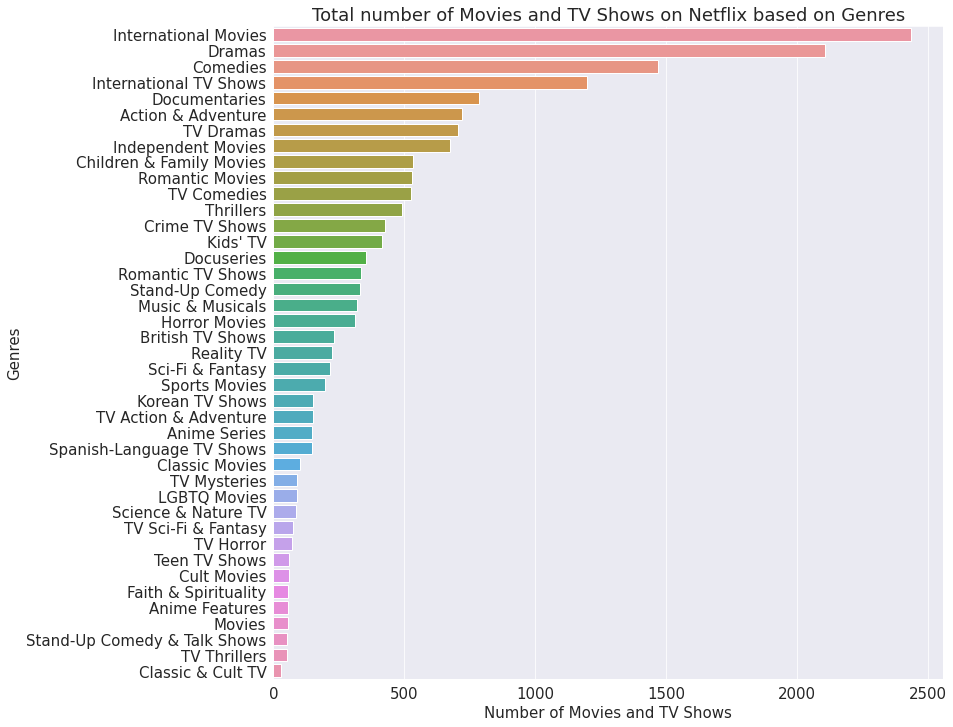

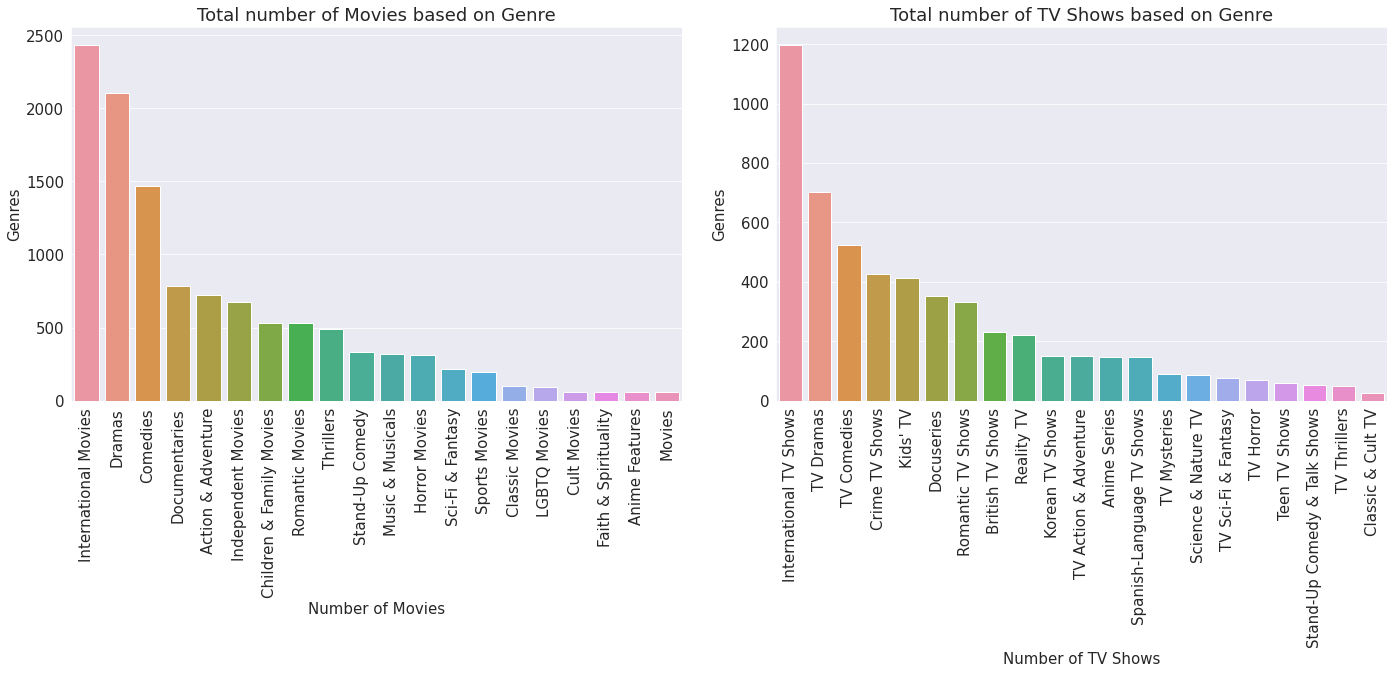

In [25]:
plt.figure(figsize=(12, 12))
sns.barplot(listed_in_data, listed_in_data.index)
plt.title("Total number of Movies and TV Shows on Netflix based on Genres")
plt.xlabel('Number of Movies and TV Shows')
plt.ylabel('Genres');

fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.barplot(listed_in_data_movies.index, listed_in_data_movies,  ax = axes[0])
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Genres')
axes[0].set_title('Total number of Movies based on Genre')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)


sns.barplot(listed_in_data_tv.index, listed_in_data_tv, ax = axes[1])
axes[1].set_xlabel('Number of TV Shows')
axes[1].set_ylabel('Genres')
axes[1].set_title('Total number of TV Shows based on Genre')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)


plt.tight_layout(pad=2);

**Visualizing total number of titles based on genres for Movies and TV Shows separately**

**Out of the International Movies, what are the percentages of movies belonging to each country?**

In [26]:
net_cpy['country'] = net_cpy['country'].str.split(', ')
# explode the lists
net_cpy = net_cpy.explode('country').reset_index(drop=True)


In [27]:
international_df = net_cpy[net_cpy['listed_in']=='International Movies'].country.value_counts()
international_df.drop(["United Kingdom,", "Cambodia,", "Poland,"], inplace = True)
#international_df.duplicated()
top30 = international_df.head(30)

In [28]:
top30

India                   828
France                  191
United Kingdom          148
United States           146
Spain                   130
Egypt                    95
Germany                  82
Hong Kong                81
Philippines              77
Turkey                   77
Indonesia                71
Mexico                   65
China                    64
Nigeria                  64
Japan                    61
Canada                   56
Belgium                  55
Argentina                51
Italy                    49
South Korea              39
Thailand                 38
Brazil                   37
South Africa             34
Netherlands              33
Australia                25
United Arab Emirates     23
Denmark                  21
Poland                   21
Pakistan                 19
Lebanon                  18
Name: country, dtype: int64

**20 Indian Directors with highest number of International Movies**

In [29]:
#This piece of code is just to double check as I was doubtful that Inida has such high number of movies

x = net_cpy[net_cpy['country']=='India']
y = x[x['listed_in']=='International Movies']
z = x[x['listed_in']=='International TV Shows']

y_cpy2 = y.copy()
z_cpy2 = z.copy()

y_cpy2['director'] = y_cpy2['director'].str.split(', ')
# explode the lists
y_cpy2 = y_cpy2.explode('director').reset_index(drop=True)

z_cpy2['director'] = z_cpy2['director'].str.split(', ')
# explode the lists
z_cpy2 = z_cpy2.explode('director').reset_index(drop=True)



In [30]:
top_ind_dir_mov = y_cpy2.director.value_counts()
top_ind_dir_tv = z_cpy2.director.value_counts()
top_ind_dir_mov = top_ind_dir_mov.loc[top_ind_dir_mov > 2]

In [31]:
top_ind_dir_mov

Umesh Mehra         8
Anurag Kashyap      8
David Dhawan        8
Dibakar Banerjee    7
Priyadarshan        6
                   ..
Sunil Sukthankar    3
Mani Ratnam         3
Raj Kapoor          3
Shirish Kunder      3
Mahesh Bhatt        3
Name: director, Length: 63, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-32-9d4c4ecc4930>:24

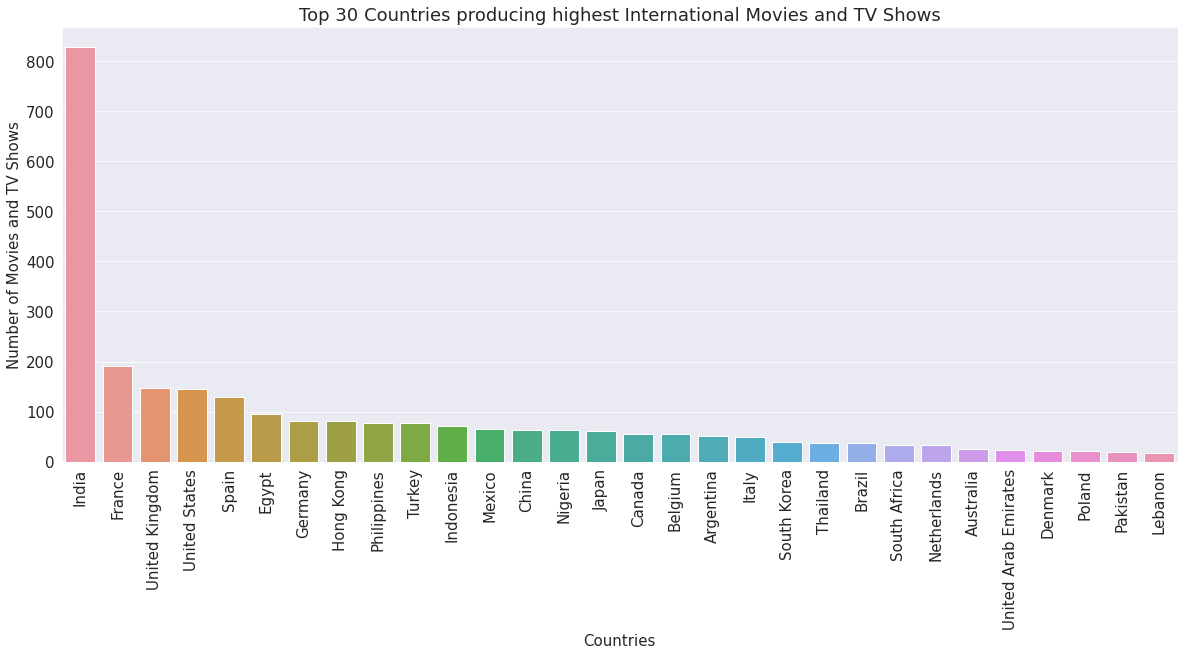

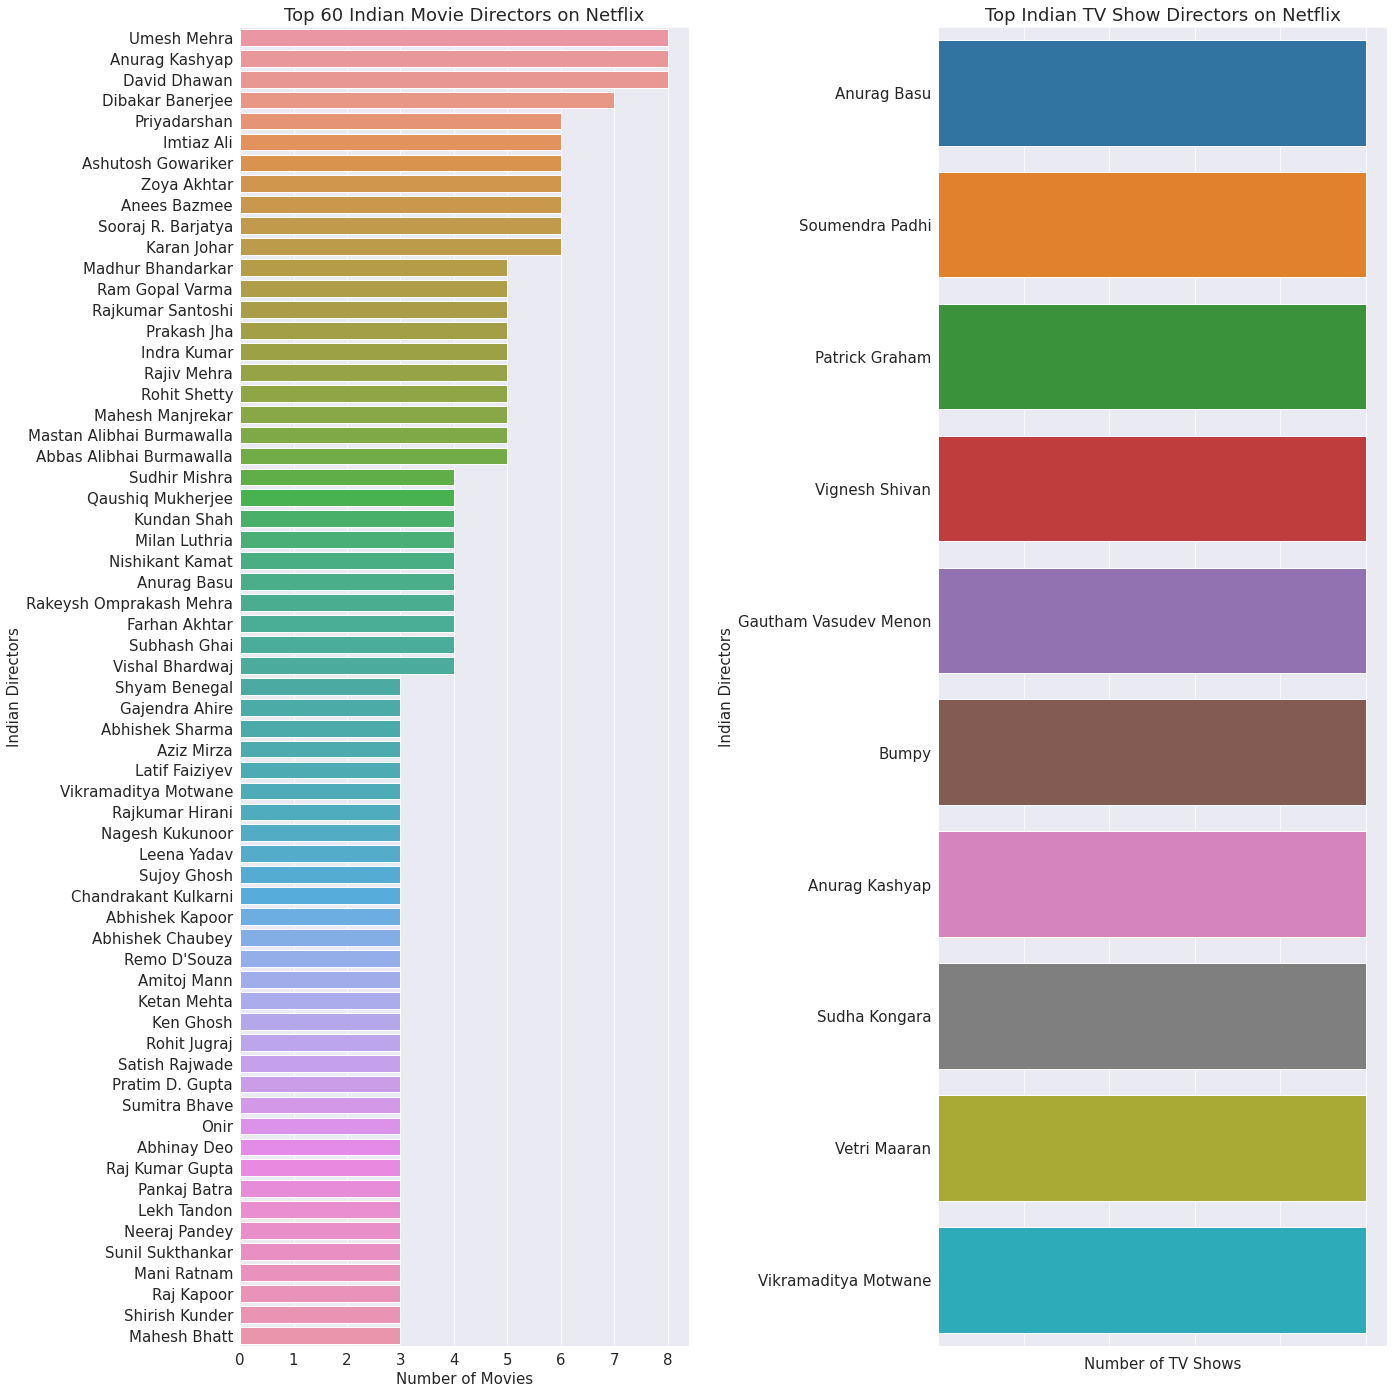

In [32]:
plt.figure(figsize=(20, 8))
sns.barplot(top30.index, top30)
plt.title("Top 30 Countries producing highest International Movies and TV Shows")
plt.xlabel('Countries')
plt.xticks(rotation = 90)
plt.ylabel('Number of Movies and TV Shows');


fig, axes = plt.subplots(1,2, figsize=(20,20))

sns.barplot(top_ind_dir_mov,  top_ind_dir_mov.index, ax = axes[0])
axes[0].set_xlabel('Number of Movies')
axes[0].set_ylabel('Indian Directors')
axes[0].set_title('Top 60 Indian Movie Directors on Netflix')
#axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)




sns.barplot(top_ind_dir_tv,  top_ind_dir_tv.index, ax = axes[1])
axes[1].set_xlabel('Number of TV Shows')
axes[1].set_ylabel('Indian Directors')
axes[1].set_title('Top Indian TV Show Directors on Netflix')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)


plt.tight_layout(pad=2);

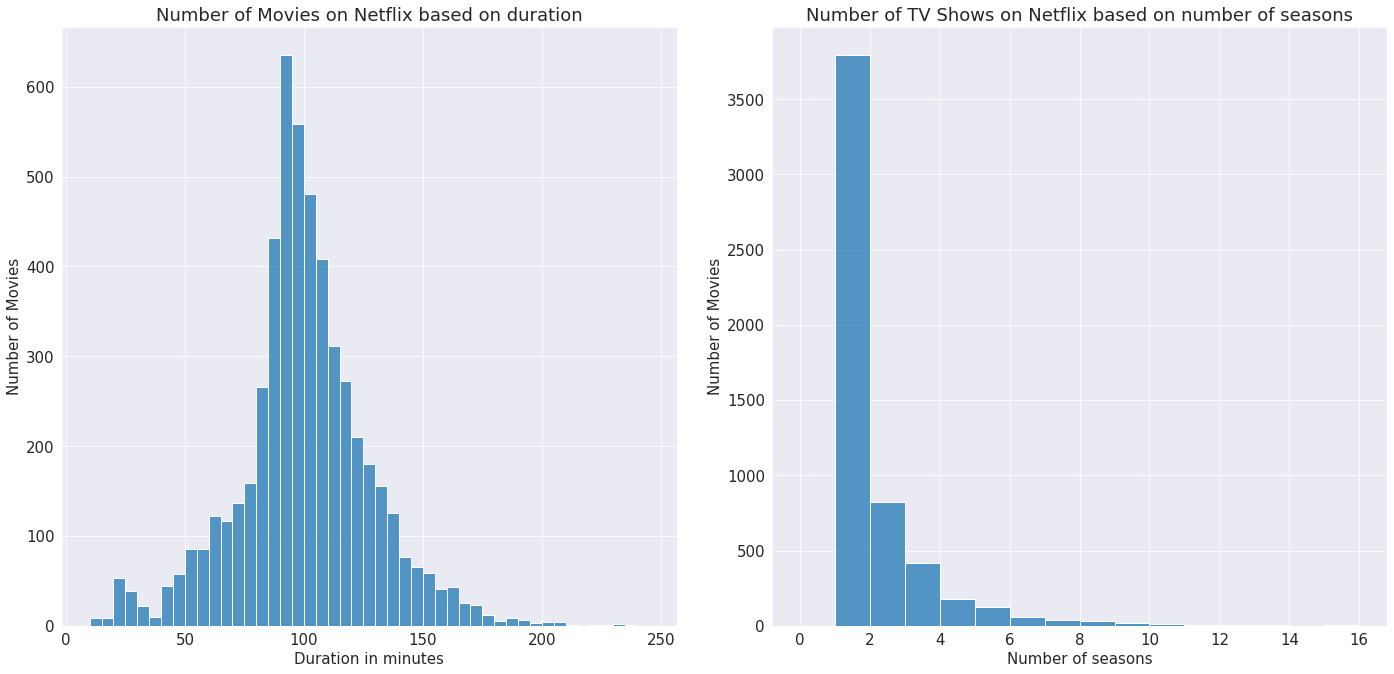

In [33]:
import numpy as np
fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.histplot(netflix_movies_df.duration_in_mins, bins=np.arange(10,250,5),  ax = axes[0])
axes[0].set_xlabel('Duration in minutes')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies on Netflix based on duration')

sns.histplot(netflix_tvshows_df.duration_in_mins, bins=np.arange(0,17,1),  ax = axes[1])
axes[1].set_xlabel('Number of seasons')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Number of TV Shows on Netflix based on number of seasons')

plt.tight_layout(pad=2);


**20 Indian Directors with highest number of International Movies**

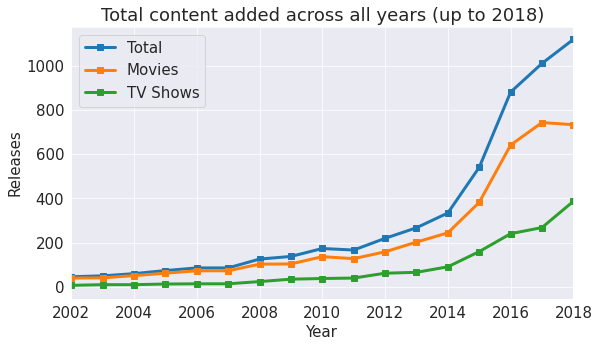

In [38]:
release = netflix_df[['type', 'release_year']].copy()

y_axis = release.groupby(['release_year']).size()
x_axis = release.release_year

mov_release = release[release['type']=='Movie']
tv_release = release[release['type']=='TV Show']


fig = plt.figure()
ax = fig.add_subplot(111)

release.groupby(['release_year']).size().plot( kind='line', marker='s', label = "Total", lw=3)
    
mov_release.groupby(['release_year']).size().plot( kind='line', marker='s',label = "Movies", lw=3)

tv_release.groupby(['release_year']).size().plot( kind='line', marker='s', label = "TV Shows", lw=3)

plt.title("Total content added across all years (up to 2018)")
plt.ylabel("Releases")
plt.xlabel("Year")
plt.xlim([2002, 2018])


plt.legend()
plt.show();

In [39]:
values = release.groupby(['release_year']).size()
values



release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Length: 73, dtype: int64

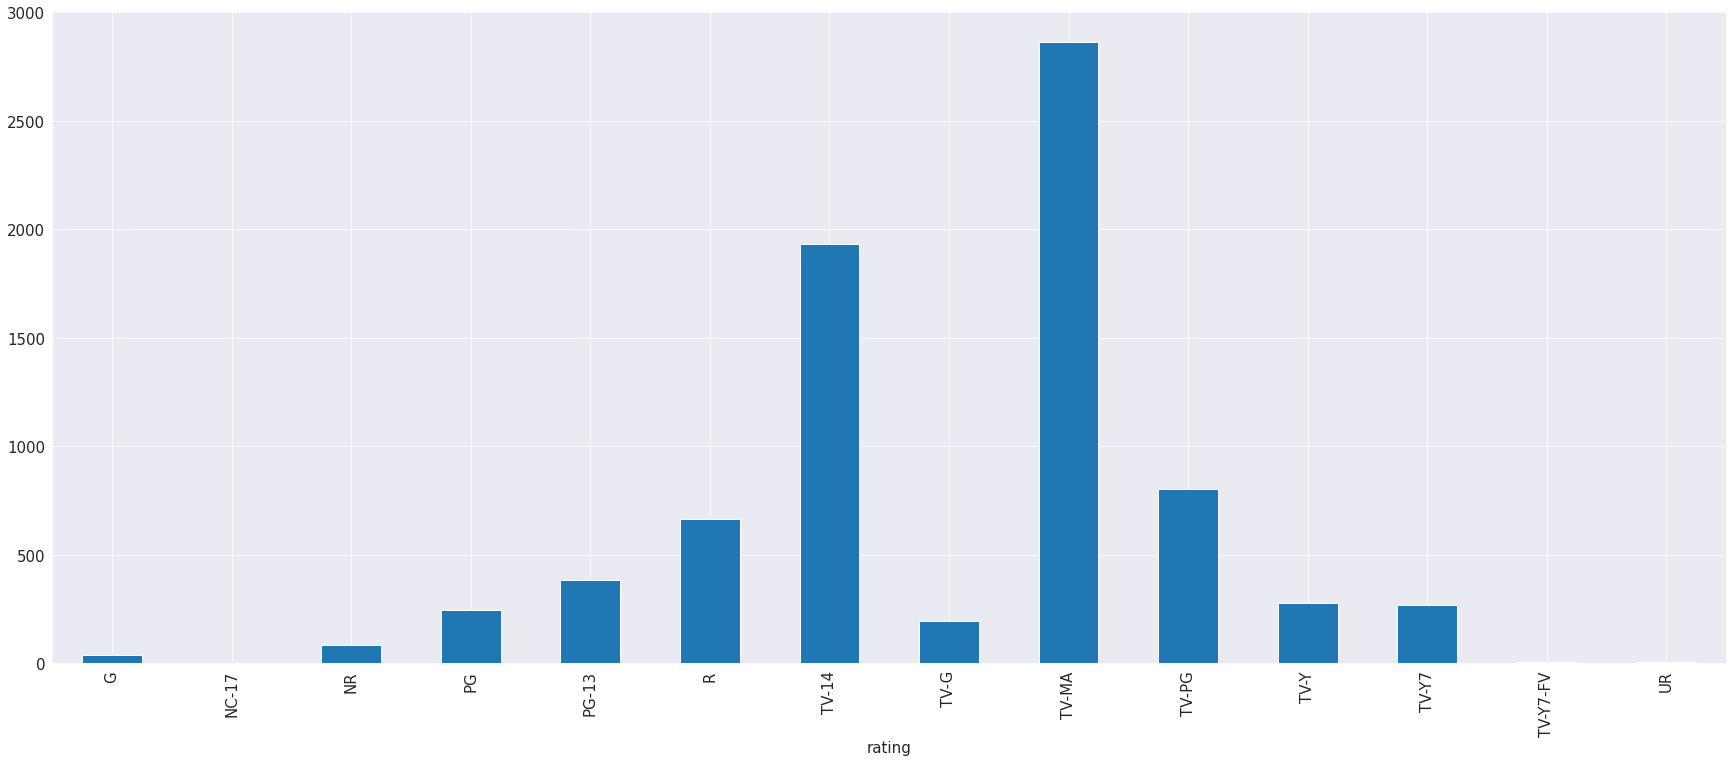

<Figure size 2160x864 with 0 Axes>

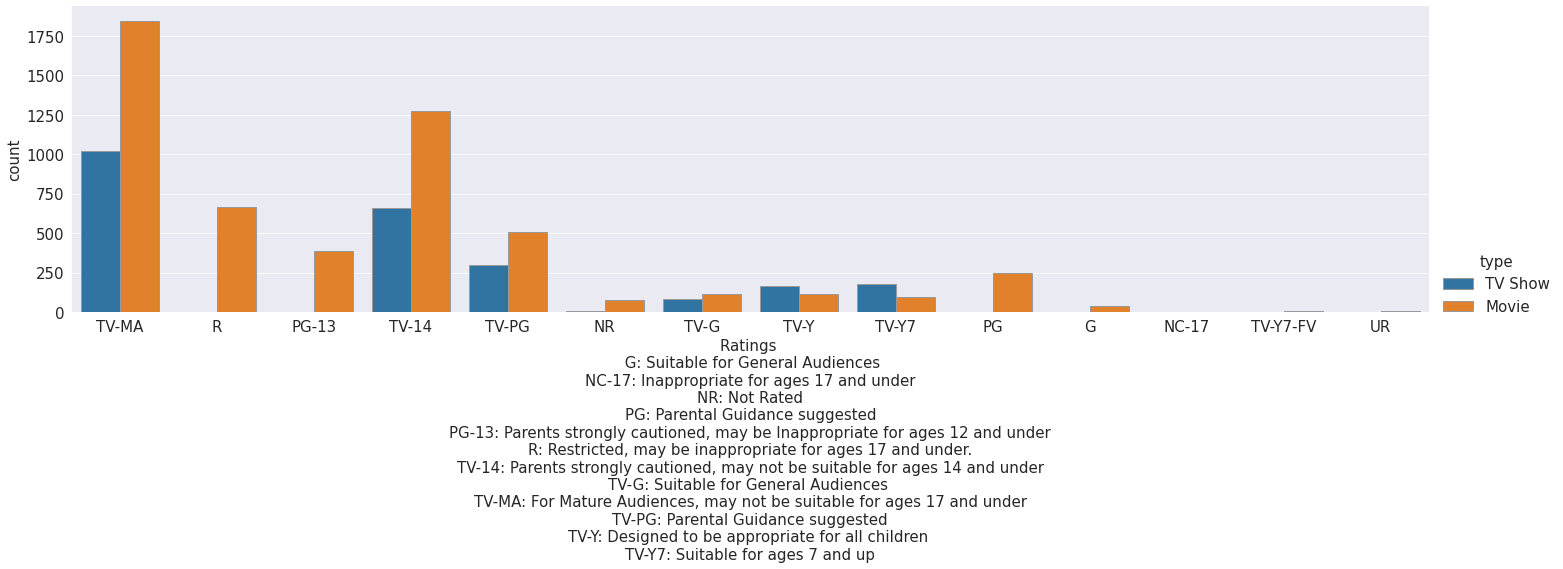

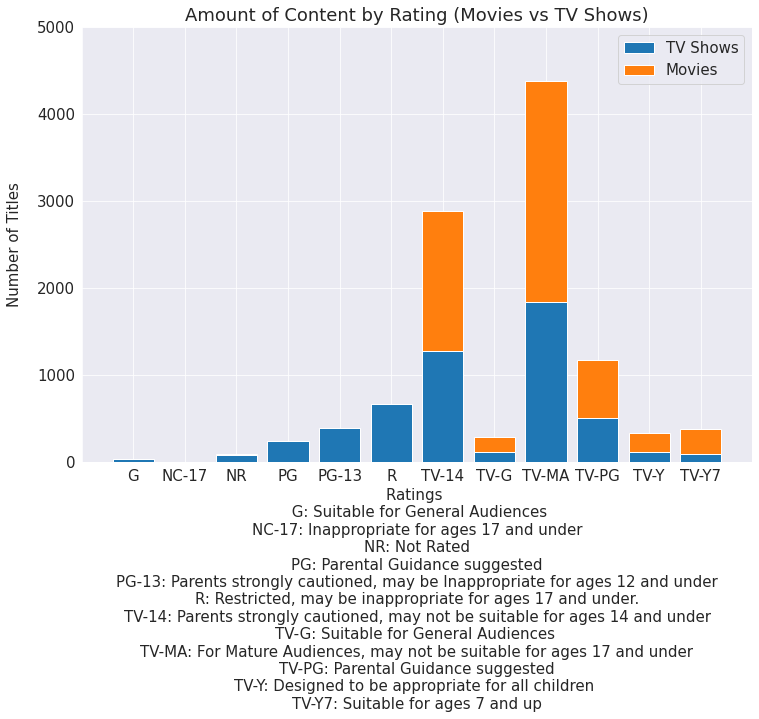

In [40]:

plt.figure(figsize=(30, 12))
netflix_df.groupby(['rating']).size().plot(kind='bar')
#highly_installed_apps= google_df.sort_values(by = ['Installs'], ascending = False)

plt.figure(figsize=(30, 12))
#sns.barplot(y="rating", hue="type", x="count", edgecolor=".6", data=xx);
sns.catplot(x="rating", hue="type", kind="count", aspect=4,
             edgecolor=".6", data=netflix_df);
plt.xlabel('''Ratings \n G: Suitable for General Audiences
NC-17: Inappropriate for ages 17 and under
NR: Not Rated
PG: Parental Guidance suggested
PG-13: Parents strongly cautioned, may be Inappropriate for ages 12 and under
R: Restricted, may be inappropriate for ages 17 and under.
TV-14: Parents strongly cautioned, may not be suitable for ages 14 and under
TV-G: Suitable for General Audiences 
TV-MA: For Mature Audiences, may not be suitable for ages 17 and under
TV-PG: Parental Guidance suggested
TV-Y: Designed to be appropriate for all children 
TV-Y7: Suitable for ages 7 and up''')

plt.figure(figsize=(12, 8))
order = netflix_df.rating.unique()
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_tvshows_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "G", "title" : 0},{"rating" : "PG", "title" : 0},{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)

count_movies.drop(count_movies.loc[count_movies['rating']=='UR'].index, inplace=True)
count_shows.drop(count_shows.loc[count_shows['rating']=='UR'].index, inplace=True)
count_movies.drop(count_movies.loc[count_movies['rating']=='TV-Y7-FV'].index, inplace=True)
count_shows.drop(count_shows.loc[count_shows['rating']=='TV-Y7-FV'].index, inplace=True)

merged_total = pd.merge(count_movies, count_shows, on=["rating"])
merged_total


plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(merged_total.rating, merged_total.title_x)
plt.bar(merged_total.rating, merged_total.title_y, bottom=merged_total.title_x)
plt.legend(['TV Shows', 'Movies'])
plt.ylim(0, 5000)

plt.ylabel('Number of Titles', labelpad=15)
plt.xlabel('''Ratings \n G: Suitable for General Audiences
NC-17: Inappropriate for ages 17 and under
NR: Not Rated
PG: Parental Guidance suggested
PG-13: Parents strongly cautioned, may be Inappropriate for ages 12 and under
R: Restricted, may be inappropriate for ages 17 and under.
TV-14: Parents strongly cautioned, may not be suitable for ages 14 and under
TV-G: Suitable for General Audiences 
TV-MA: For Mature Audiences, may not be suitable for ages 17 and under
TV-PG: Parental Guidance suggested
TV-Y: Designed to be appropriate for all children 
TV-Y7: Suitable for ages 7 and up''')
plt.show();

In [41]:

x = net_cpy[net_cpy['country']=='India']
y = x[x['listed_in']=='International Movies']
z = x[x['listed_in']=='International TV Shows']

y_cpy2 = y.copy()
z_cpy2 = z.copy()

y_cpy2['director'] = y_cpy2['director'].str.split(', ')
# explode the lists
y_cpy2 = y_cpy2.explode('director').reset_index(drop=True)

z_cpy2['director'] = z_cpy2['director'].str.split(', ')
# explode the lists
z_cpy2 = z_cpy2.explode('director').reset_index(drop=True)




/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 30 Most popular Indian Actors on Netflix')

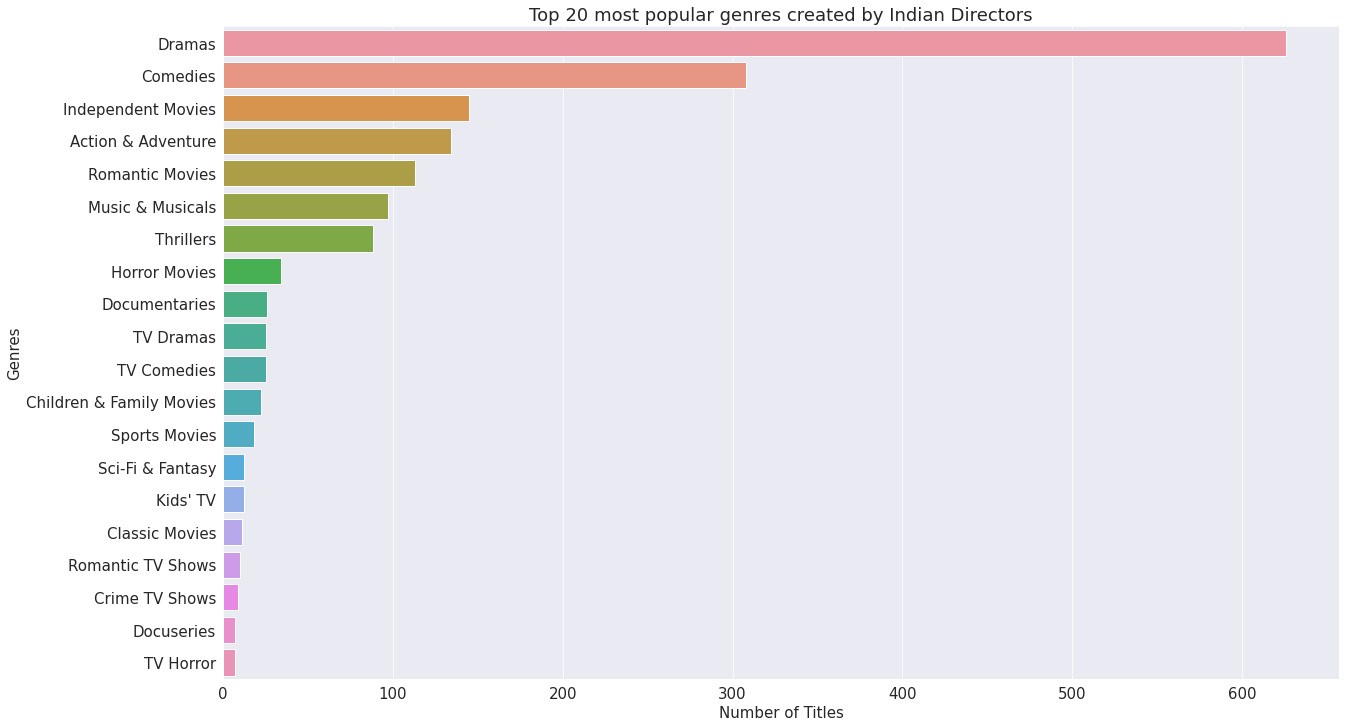

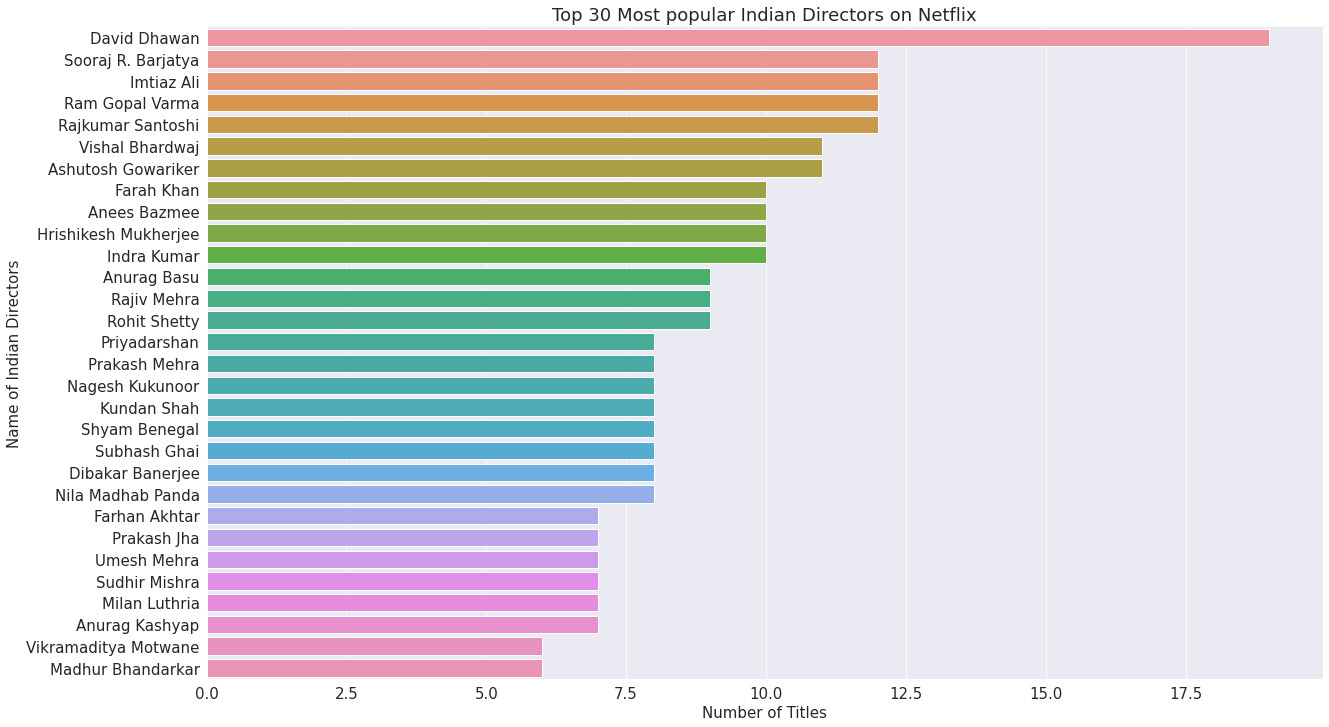

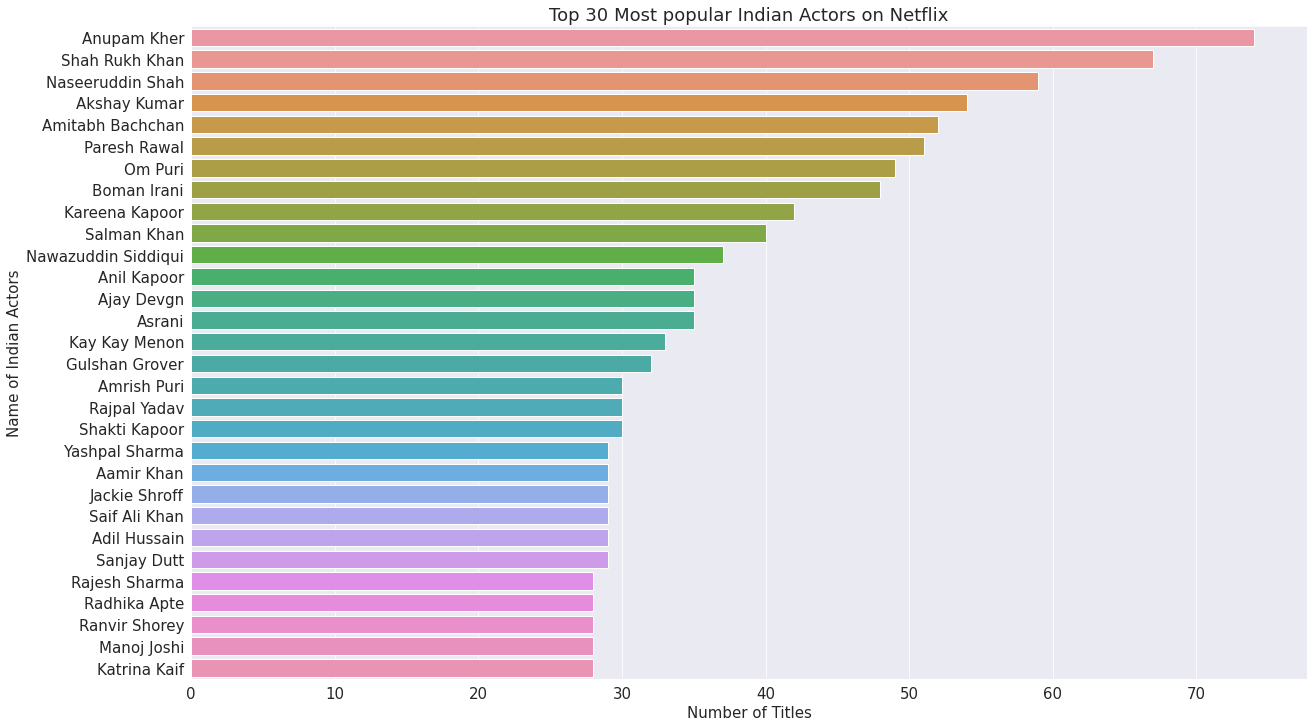

In [42]:
from matplotlib.ticker import MaxNLocator
ind_dir_filtered = x[["type", "title", "director", "cast", "listed_in"]].copy()
ind_dir_filtered.drop(ind_dir_filtered[ind_dir_filtered.listed_in == 'International Movies'].index, inplace=True)
ind_dir_filtered.drop(ind_dir_filtered[ind_dir_filtered.listed_in == 'International TV Shows'].index, inplace=True)

plt.figure(figsize=(20, 12))
ind_dir_filtered_graph1 = ind_dir_filtered.groupby(['listed_in']).size().sort_values(ascending=False).head(20)
sns.barplot(ind_dir_filtered_graph1, ind_dir_filtered_graph1.index)
#plt.xticks(rotation = 90)

plt.ylabel("Genres")
plt.xlabel("Number of Titles")
plt.title("Top 20 most popular genres created by Indian Directors")

plt.figure(figsize=(20, 12))
plt.ylim(0,20)
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
ind_dir_filtered_graph2 = ind_dir_filtered.groupby(['director']).size().sort_values(ascending=False).head(30)
sns.barplot(ind_dir_filtered_graph2, ind_dir_filtered_graph2.index)
#plt.xticks(rotation = 90)

plt.xlabel("Number of Titles")
plt.ylabel("Name of Indian Directors")
plt.title("Top 30 Most popular Indian Directors on Netflix")



ind_cast_filtered = ind_dir_filtered[["title", "cast", "listed_in"]].copy()
ind_cast_filtered['cast'] = ind_cast_filtered['cast'].str.split(', ')

# explode the lists
ind_cast_filtered = ind_cast_filtered.explode('cast').reset_index(drop=True)
ind_cast_filtered_graph = ind_cast_filtered.groupby(['cast']).size().sort_values(ascending=False).head(30)

plt.figure(figsize=(20, 12))
sns.barplot(ind_cast_filtered_graph, ind_cast_filtered_graph.index)
#plt.xticks(rotation = 90)
plt.xlabel("Number of Titles")
plt.ylabel("Name of Indian Actors")
plt.title("Top 30 Most popular Indian Actors on Netflix")




Content Added Over the years 
Top Indian Actors
Top countries creating content
Top 10 DIRECTORS OVERALL: and movies directed by them
Top 10 Actors OVERALL: and shows directed by them


In [43]:
netflix_df_month_wise_analysis = netflix_df.copy()

**Changing flot to int with "Nan" values present as float**

In [44]:
cols = ['date_added_month']
for col in cols:
   netflix_df_month_wise_analysis[col] = netflix_df_month_wise_analysis[col].apply(lambda x: int(x) if x == x else "")


In [45]:
cols = ['date_added_year']
for col in cols:
   netflix_df_month_wise_analysis[col] = netflix_df_month_wise_analysis[col].apply(lambda x: int(x) if x == x else "")


In [46]:
netflix_df_month_wise_analysis

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day,date_added_weekday,duration_in_mins
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14.0,4.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23.0,4.0,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20.0,3.0,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16.0,3.0,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1.0,2.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,19.0,0.0,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,2.0,5.0,111
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,25.0,4.0,44
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,31.0,5.0,1


In [47]:
netflix_df_month_wise_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   show_id             7787 non-null   object        
 1   type                7787 non-null   object        
 2   title               7787 non-null   object        
 3   director            5398 non-null   object        
 4   cast                7069 non-null   object        
 5   country             7280 non-null   object        
 6   date_added          7777 non-null   datetime64[ns]
 7   release_year        7787 non-null   int64         
 8   rating              7780 non-null   object        
 9   duration            7787 non-null   object        
 10  listed_in           7787 non-null   object        
 11  description         7787 non-null   object        
 12  date_added_year     7787 non-null   object        
 13  date_added_month    7787 non-null   object      

In [48]:
for g in range(0,7787):
    if netflix_df_month_wise_analysis.date_added_month[g] == 1:
        netflix_df_month_wise_analysis.date_added_month[g] = "January"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 2:
        netflix_df_month_wise_analysis.date_added_month[g] = "February"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 3:
        netflix_df_month_wise_analysis.date_added_month[g] = "March"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 4:
        netflix_df_month_wise_analysis.date_added_month[g] = "April"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 5:
        netflix_df_month_wise_analysis.date_added_month[g] = "May"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 6:
        netflix_df_month_wise_analysis.date_added_month[g] = "June"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 7:
        netflix_df_month_wise_analysis.date_added_month[g] = "July"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 8:
        netflix_df_month_wise_analysis.date_added_month[g] = "August"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 9:
        netflix_df_month_wise_analysis.date_added_month[g] = "September"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 10:
        netflix_df_month_wise_analysis.date_added_month[g] = "October"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 11:
        netflix_df_month_wise_analysis.date_added_month[g] = "November"
    elif netflix_df_month_wise_analysis.date_added_month[g] == 12:
        netflix_df_month_wise_analysis.date_added_month[g] = "December"
    else:
        netflix_df_month_wise_analysis.date_added_month[g] = "nan"
    

<ipython-input-48-ed0b0e83788f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_month_wise_analysis.date_added_month[g] = "August"
<ipython-input-48-ed0b0e83788f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_month_wise_analysis.date_added_month[g] = "December"
<ipython-input-48-ed0b0e83788f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_df_month_wise_analysis.date_added_month[g] = "November"
<ip

In [49]:
netflix_df_month_wise_analysis

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day,date_added_weekday,duration_in_mins
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14.0,4.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23.0,4.0,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20.0,3.0,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16.0,3.0,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1.0,2.0,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,19.0,0.0,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,2.0,5.0,111
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,25.0,4.0,44
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,31.0,5.0,1


Text(0.5, 1.0, 'Distribution of Releases based on Months on Netflix')

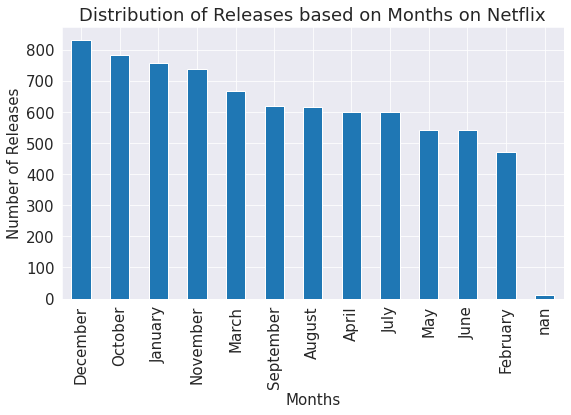

In [50]:
netflix_df_month_wise_analysis.groupby(["date_added_month"]).size().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Months")
plt.ylabel("Number of Releases")
plt.title("Distribution of Releases based on Months on Netflix")



In [51]:
release_dist_df = netflix_df_month_wise_analysis[["date_added_month", "date_added_year", "title"]].copy()
fff = release_dist_df.groupby([ "date_added_month", "date_added_year"])
fff

#release_dist_df_2 = fff.pivot("date_added_month", "date_added_year", "title")
#flights = flights.pivot("month", "year", "passengers")
#ax = sns.heatmap(release_dist_df_2)
#plt.title("Heatmap Flight Data")
#plt.show()

In [52]:
release_dist_df["titles_count"] = release_dist_df["title"].copy() 

for col in release_dist_df.titles_count:
    release_dist_df["titles_count"].values[:] = 0

release_dist_df.drop(release_dist_df.loc[release_dist_df['date_added_month']=='nan'].index, inplace=True)


release_dist_df.sample(20)

,date_added_month,date_added_year,title,titles_count
1154,December,2020,Bwakaw,0
7059,April,2020,Thor: Tales of Asgard,0
1985,November,2020,Elliot the Littlest Reindeer,0
2681,December,2016,Heaven's Garden,0
4633,May,2019,Once Upon a Time in Mumbaai,0
7392,November,2019,Vantage Point,0
1362,November,2020,Christmas Break-In,0
6458,October,2018,The Hollywood Masters,0
4555,August,2018,Nymphomaniac: Volume II,0
2286,January,2020,Friday the 13th,0


In [53]:

group_by_both = release_dist_df.groupby(["date_added_year", "date_added_month"]).count()
group_by_both.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100 entries, (2008, 'February') to (2021, 'January')
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title         100 non-null    int64
 1   titles_count  100 non-null    int64
dtypes: int64(2)
memory usage: 2.1+ KB


In [54]:
plt.figure(figsize=(20, 12))
heatmap1_data = pd.pivot_table(group_by_both, values='titles_count', 
                     index=['date_added_month'], 
                     columns='date_added_year')


<Figure size 1440x864 with 0 Axes>

<AxesSubplot:xlabel='date_added_year', ylabel='date_added_month'>

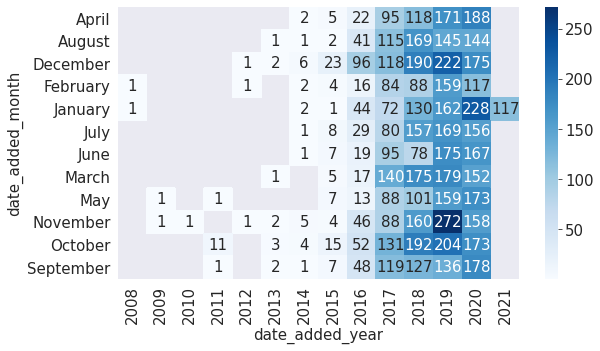

In [58]:
sns.heatmap(heatmap1_data, fmt="0.0f", annot=True, cmap='Blues')

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, 
PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako,
 mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [66]:
import jovian

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kiranpatel4192/netflix-movies-and-shows" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/kiranpatel4192/netflix-movies-and-shows


'https://jovian.ai/kiranpatel4192/netflix-movies-and-shows'